<a href="https://colab.research.google.com/github/daeyeong8855/Image-Manipulation-and-Dataset-Construction/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC_%EA%B3%A0%EA%B8%89%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 블러 처리 요약

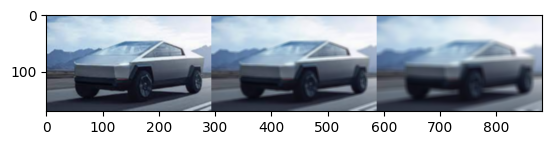

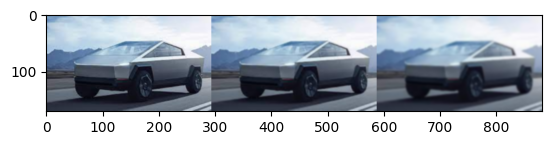

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 가져오기
os.makedirs('./data', exist_ok=True)
# car = cv2.imread('./data/car.jpeg', 0) 은 흑백
car = cv2.imread('./data/car.png')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)



blurr = np.hstack([
    cv2.blur(car, (3,3)),
    cv2.blur(car, (5,5)),
    cv2.blur(car, (9,9))
])

plt.imshow(blurr,'gray')
plt.show()

gaussian_blurr = np.hstack([
    cv2.GaussianBlur(car, (3,3),0),
    cv2.GaussianBlur(car, (5,5),0),
    cv2.GaussianBlur(car, (9,9),0)
])

plt.imshow(gaussian_blurr)
plt.show()

## 선명도 처리

### 커스텀 필터 : cv2.filter2D

<function matplotlib.pyplot.show(close=None, block=None)>

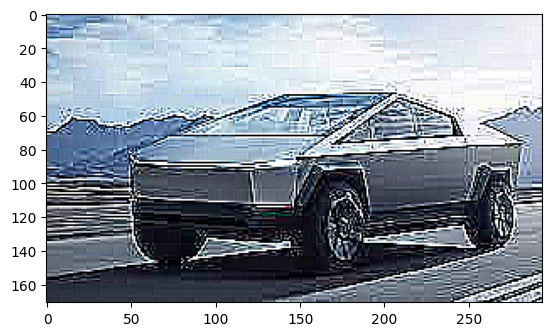

In [7]:
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

sharpen_car = cv2.filter2D(car,-1,filter)

plt.imshow(sharpen_car)
plt.show

### 샤프닝 필터 : 멕시칸 햇 & 라플라시안 필터

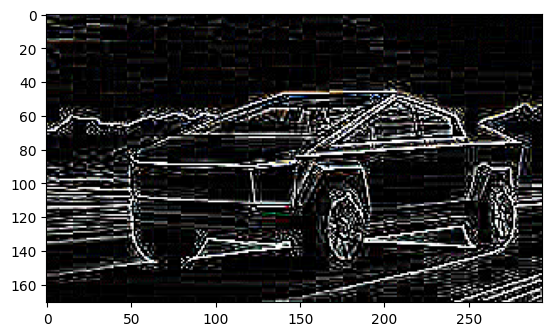

In [8]:
filter = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
maxican_car = cv2.filter2D(car, -1,filter)

plt.imshow(maxican_car)
plt.show()

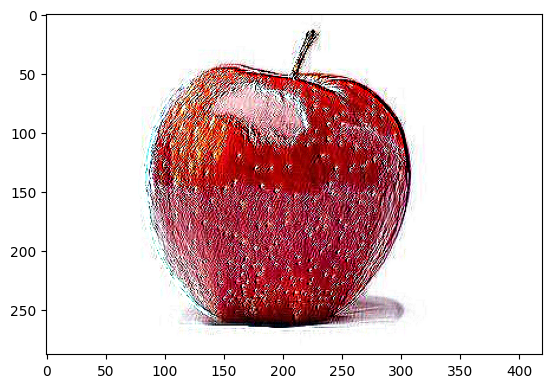

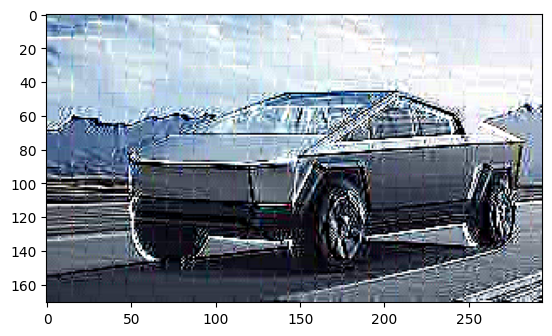

In [9]:
import glob

image_path = "./data"

image_list = glob.glob(os.path.join(image_path, "*.png"))

for path in image_list : 
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # custom filter 
    filter = np.array([[1,1,-2], [-4,6,-5], [5,-1,-0]])
    
    # custom filter 적용
    custom_filter_img = cv2.filter2D(image, -1, filter)
    
    plt.imshow(custom_filter_img)
    plt.show()

### 다양한 효과 필터

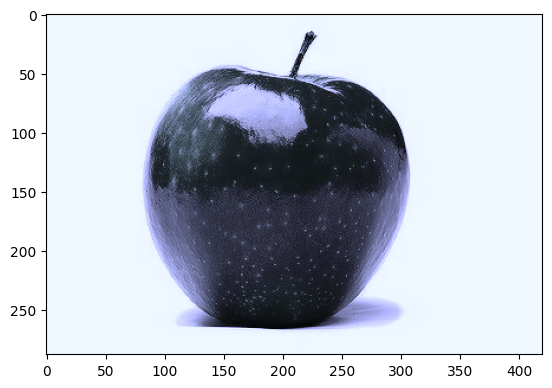

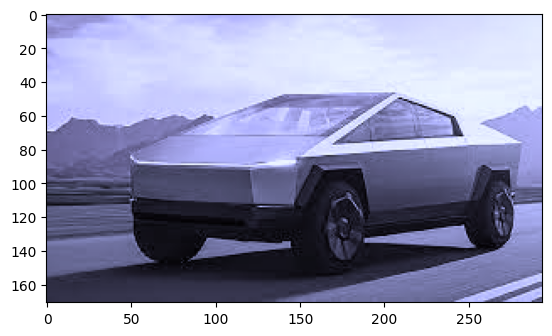

In [10]:
image_path = "./data"

image_list = glob.glob(os.path.join(image_path,"*.png"))

for path in image_list : 
    image = cv2.imread(path, 1)
        
    # 효과 필터 적용 
    filter_ = np.array([[0.272, 0.534, 0.131],[0.119,0.686,0.168],[0.393,0.769,0.189]])
    
    sepia_img = cv2.transform(image, filter_)
    
    plt.imshow(sepia_img)
    plt.show()

### 엠보스 효과

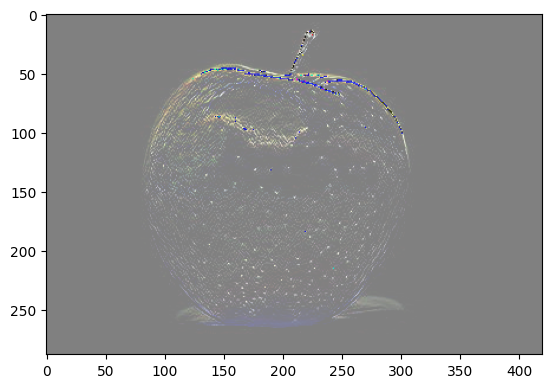

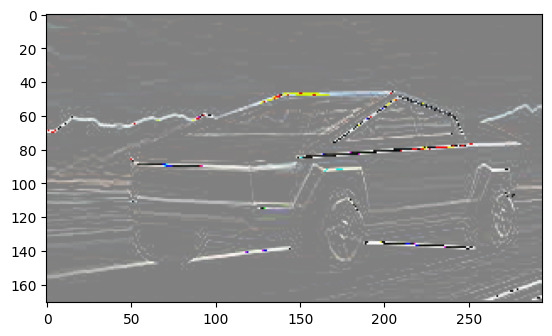

In [11]:
image_path = "./data"

image_list = glob.glob(os.path.join(image_path,"*.png"))

for path in image_list : 
    image = cv2.imread(path, 1)
    
    # 엠보스 효과 
    filter_temp = np.array(([0,1,0], [0,0,0], [0,-1,0]))
    
    emboss_img = cv2.filter2D(image, -1, filter_temp)
    emboss_img = emboss_img + 128
    
    plt.imshow(emboss_img)
    plt.show()

## 확장, 침식 실험

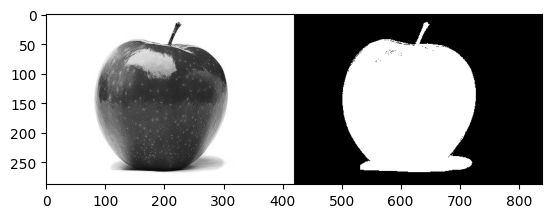

In [13]:
image_path = "./data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)

image_list = np.hstack([
    image,
    mask
])

plt.imshow(image_list, 'gray')
plt.show()

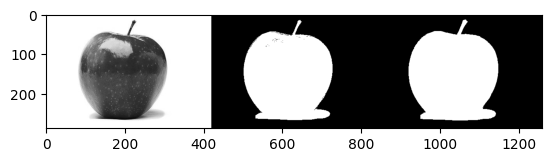

In [14]:
_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)
kernal = np.ones((3,3), np.uint8)

dilation = cv2.dilate(mask, kernal)

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

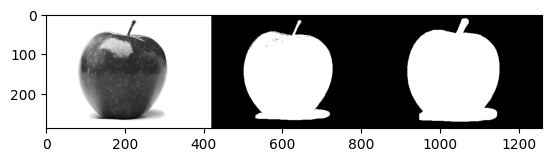

In [15]:
_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)
kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

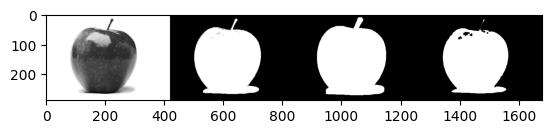

In [16]:
_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)
kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion
])

plt.imshow(image_list, 'gray')
plt.show()

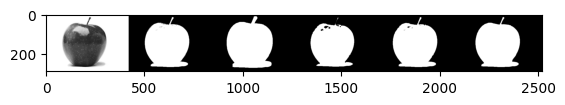

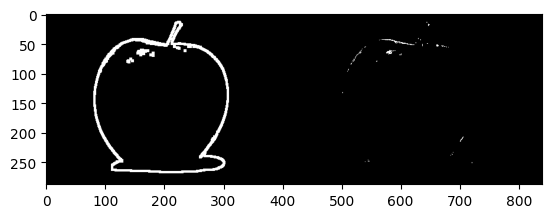

In [17]:
_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)
kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal)

# 개폐 open close 
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE ,kernal)

mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing
])

imag_list_01 = np.hstack([
    mg,
    th
])

plt.imshow(image_list, 'gray')
plt.show()

plt.imshow(imag_list_01, 'gray')
plt.show()